In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from games.permutation import *
from data_structures.trees import *
from utilities.drawing import draw_tree
from data_structures.cfr_trees import CFRTree, CFRJointStrategy, CFRNode
from cfr_code.reconstruction_cfr import SolveWithReconstructionCFR
from cfr_code.sample_cfr import SolveWithSampleCFR
from cfr_code.cfr import SolveWithCFR
import ast
from utilities.graphs import epsilon_graph, comparative_epsilon_graph

In [3]:
%load_ext autoreload
%autoreload 2

# 2 Players

In [151]:
tree = Tree()

In [152]:
n1 = tree.addNode(1, 1, tree.root)
n2 = tree.addNode(1, 1, tree.root)
n3 = tree.addNode(1, 1, tree.root)

In [153]:
tree.addLeaf(n1, [1, 0])
tree.addLeaf(n1, [0, 1])
tree.addLeaf(n1, [0, 0])
tree.addLeaf(n2, [0, 0])
tree.addLeaf(n2, [2, 0])
tree.addLeaf(n2, [0, 1])
tree.addLeaf(n3, [0, 1])
tree.addLeaf(n3, [0, 0])
tree.addLeaf(n3, [1, 0])

Leaf12 (children of Node3 via Action 1.2) -  utility is [1, 0]

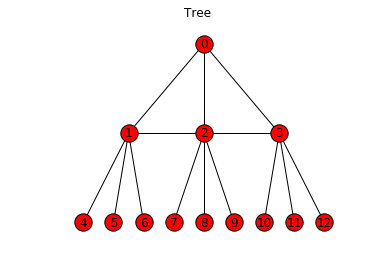

In [154]:
draw_tree(tree)

In [155]:
res_cfr = SolveWithCFR(CFRTree(tree), 10000, checkEveryIteration = 1, show_perc = True)
res_rcfr = SolveWithReconstructionCFR(CFRTree(tree), 10000, reconstructEveryIteration = 1, 
                                      checkEveryIteration = 1, show_perc = True)
res_scfr = SolveWithSampleCFR(CFRTree(tree), 10000, checkEveryIteration = 1, show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


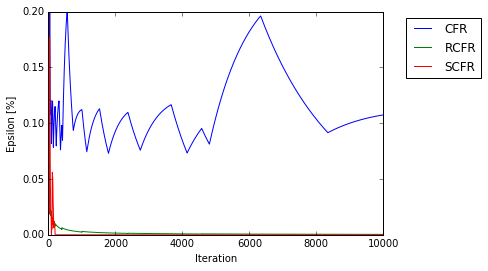

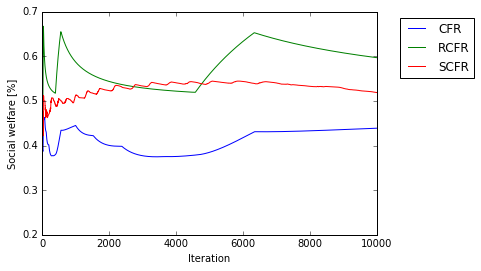

In [157]:
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, ylims = (0, 0.2))
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, max_social_welfare = 2, yaxis = 'social_welfare')

# 3 Players

In [167]:
tree = Tree(3)

In [168]:
n1 = tree.addNode(1, 1, tree.root)
n2 = tree.addNode(1, 1, tree.root)
n3 = tree.addNode(1, 1, tree.root)

In [169]:
n11 = tree.addNode(2, 2, n1)
n12 = tree.addNode(2, 2, n1)
n13 = tree.addNode(2, 2, n1)
n21 = tree.addNode(2, 2, n2)
n22 = tree.addNode(2, 2, n2)
n23 = tree.addNode(2, 2, n2)
n31 = tree.addNode(2, 2, n3)
n32 = tree.addNode(2, 2, n3)
n33 = tree.addNode(2, 2, n3)

In [170]:
tree.addLeaf(n11, [1, 0, 0])
tree.addLeaf(n11, [0, 1, 0])
tree.addLeaf(n11, [0, 0, 1])
tree.addLeaf(n12, [0, 1, 0])
tree.addLeaf(n12, [0, 0, 1])
tree.addLeaf(n12, [1, 0, 0])
tree.addLeaf(n13, [0, 0, 1])
tree.addLeaf(n13, [1, 0, 0])
tree.addLeaf(n13, [0, 1, 0])
tree.addLeaf(n21, [0, 1, 0])
tree.addLeaf(n21, [0, 0, 1])
tree.addLeaf(n21, [1, 0, 0])
tree.addLeaf(n22, [0, 0, 1])
tree.addLeaf(n22, [2, 0, 0])
tree.addLeaf(n22, [0, 1, 0])
tree.addLeaf(n23, [1, 0, 0])
tree.addLeaf(n23, [0, 1, 0])
tree.addLeaf(n23, [0, 0, 1])
tree.addLeaf(n31, [0, 0, 1])
tree.addLeaf(n31, [1, 0, 0])
tree.addLeaf(n31, [0, 1, 0])
tree.addLeaf(n32, [1, 0, 0])
tree.addLeaf(n32, [0, 1, 0])
tree.addLeaf(n32, [0, 0, 1])
tree.addLeaf(n33, [0, 1, 0])
tree.addLeaf(n33, [0, 0, 1])
tree.addLeaf(n33, [1, 0, 0])

Leaf39 (children of Node12 via Action 2.2) -  utility is [1, 0, 0]

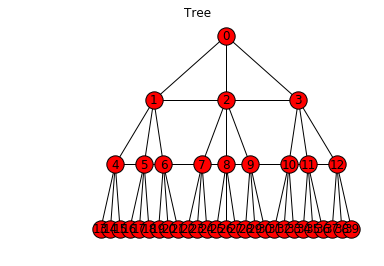

In [171]:
draw_tree(tree)

In [172]:
ct_cfr = CFRTree(tree)
res_cfr = SolveWithCFR(ct_cfr, 5000, checkEveryIteration = 5, show_perc = True)
ct_rcfr = CFRTree(tree)
res_rcfr = SolveWithReconstructionCFR(ct_rcfr, 5000, reconstructEveryIteration = 5, 
                                      checkEveryIteration = 5, show_perc = True)
ct_scfr = CFRTree(tree)
res_scfr = SolveWithSampleCFR(ct_scfr, 5000, checkEveryIteration = 5, show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


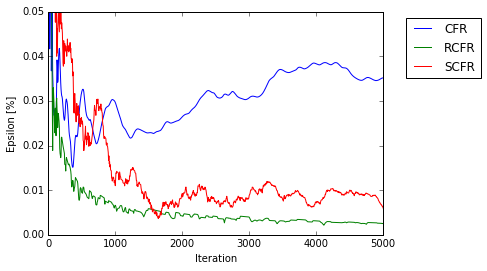

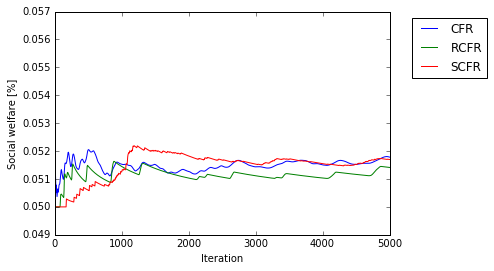

In [174]:
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, ylims = (0, 0.05))
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, yaxis = "social_welfare", max_social_welfare = 20)

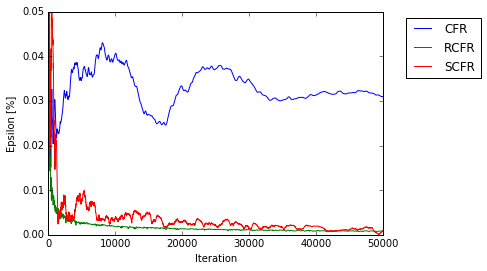

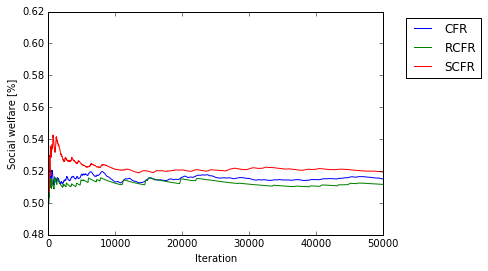

In [149]:
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, ylims = (0, 0.05))
comparative_epsilon_graph([res_cfr, res_rcfr, res_scfr], legend = ['CFR', 'RCFR', 'SCFR'],
                          delta_utility = 2, yaxis = "social_welfare", max_social_welfare = 2)